In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

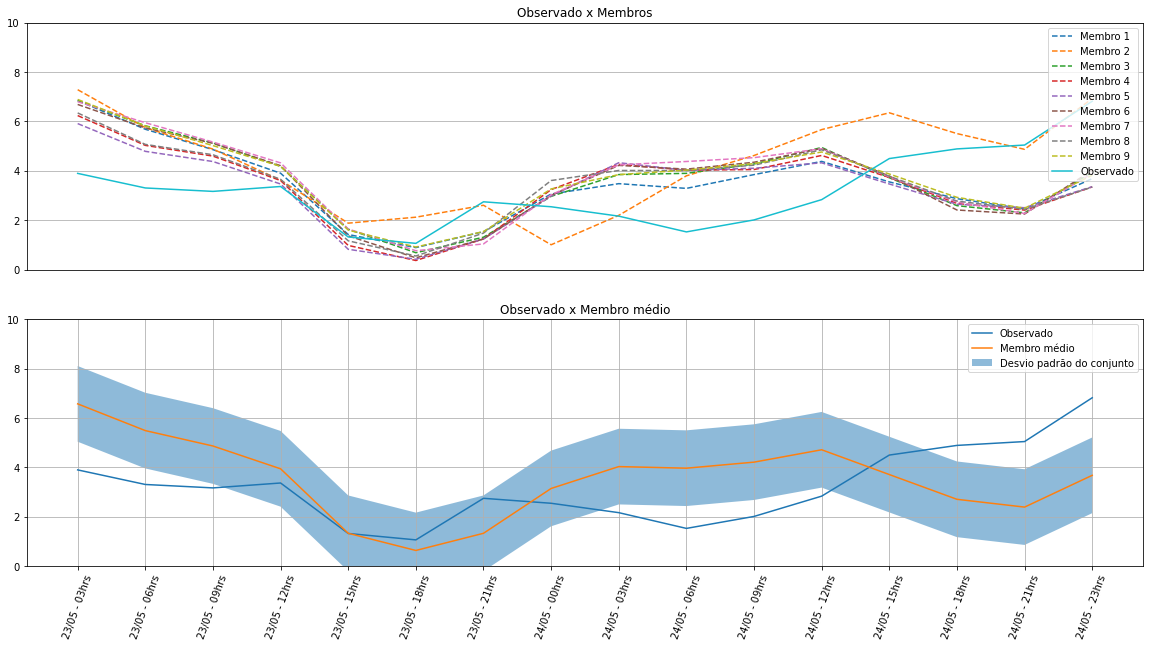

In [3]:
d = pd.read_csv('../tcc/data/ecc1_.csv')
dCaso1 = d[(d.data>'2018-05-23') & (d.data<'2018-05-25')]
dCaso1.index=dCaso1.data
predict = pd.read_csv('./data_ensemble.c1.csv')
predict = predict[(predict['times']>='2018-05-23')&(predict['times']<'2018-05-25')]
predict.index=pd.to_datetime(predict.times )
# preparar dado para vizualizar em boxplot, considerando cada intervalo de 3 hras
p1=[]
p2=[]
p3=[]
p4=[]
p5=[]
p6=[]
p7=[]
p8=[]
p9=[]
box=[]
datas=[]
list_date = pd.date_range(datetime.datetime(2018,5,23,0),datetime.datetime(2018,5,25,0),freq='3H')
for time in list_date[:-1]:
    time_i, time_f = time, time+datetime.timedelta(hours=3)
    df = predict.loc[str(time_i):str(time_f)]
    p1.append(list(map(float,df[df['membro']==1].wspd108.astype('float').to_list())))    
    p2.append(list(map(float,df[df['membro']==2].wspd108.astype('float').to_list())))
    p3.append(list(map(float,df[df['membro']==3].wspd108.astype('float').to_list())))
    p4.append(list(map(float,df[df['membro']==4].wspd108.astype('float').to_list())))
    p5.append(list(map(float,df[df['membro']==5].wspd108.astype('float').to_list())))
    p6.append(list(map(float,df[df['membro']==6].wspd108.astype('float').to_list())))
    p7.append(list(map(float,df[df['membro']==7].wspd108.astype('float').to_list())))
    p8.append(list(map(float,df[df['membro']==8].wspd108.astype('float').to_list())))
    p9.append(list(map(float,df[df['membro']==9].wspd108.astype('float').to_list())))

    
    box.append(list(map(float,dCaso1.loc[str(time_i):str(time_f)].iloc[:,6].to_list())))
    
    datas.append(list(map(str,dCaso1.loc[str(time_i):str(time_f)].iloc[:,0].to_list()))[-1])
    
newdates=[]
for i in range(len(datas)):
    date_obj = datetime.datetime.strptime(datas[i], '%Y-%m-%d %H:%M:%S')
    newdates.append('{:02d}/{:02d} - {:02d}hrs'.format(date_obj.day,date_obj.month,date_obj.hour))
media_p1=[]
media_p2=[]
media_p3=[]
media_p4=[]
media_p5=[]
media_p6=[]
media_p7=[]
media_p8=[]
media_p9=[]
media_obs=[]
for i in range(0,len(box)):
    media_obs.append(np.mean(box[i]))
    media_p1.append(np.mean(p1[i]))
    media_p2.append(np.mean(p2[i]))
    media_p3.append(np.mean(p3[i]))
    media_p4.append(np.mean(p4[i]))
    media_p5.append(np.mean(p5[i]))
    media_p6.append(np.mean(p6[i]))
    media_p7.append(np.mean(p7[i]))
    media_p8.append(np.mean(p8[i]))
    media_p9.append(np.mean(p9[i]))
mean_ensemble=(np.array(media_p1)+np.array(media_p3)+ \
               np.array(media_p4)+np.array(media_p5)+np.array(media_p6)+ \
               np.array(media_p7)+np.array(media_p8)+np.array(media_p9))/8
fig, axs = plt.subplots(2,figsize =(20, 10))
axs[0].grid(True)
axs[0].plot(newdates,media_p1,'--', label='Membro 1')
axs[0].plot(media_p2,'--', label='Membro 2')
axs[0].plot(media_p3,'--', label='Membro 3')
axs[0].plot(media_p4,'--', label='Membro 4')
axs[0].plot(media_p5,'--', label='Membro 5')
axs[0].plot(media_p6,'--', label='Membro 6')
axs[0].plot(media_p7,'--', label='Membro 7')
axs[0].plot(media_p8,'--', label='Membro 8')
axs[0].plot(media_p9,'--', label='Membro 9')
axs[0].plot(media_obs, label="Observado")
axs[0].set_ylim(0,10)
axs[0].legend()
axs[0].get_xaxis().set_visible(False)
axs[0].set_title("Observado x Membros")

axs[1].plot(newdates,media_obs, label="Observado")
axs[1].plot(mean_ensemble, label="Membro médio")
axs[1].fill_between(range(16), mean_ensemble-np.std(mean_ensemble), mean_ensemble+np.std(mean_ensemble),
                    alpha = 0.5, label='Desvio padrão do conjunto')
axs[1].set_ylim(0,10)
axs[1].grid(True)
axs[1].legend()
axs[1].set_title("Observado x Membro médio")
degrees = 70
plt.xticks(rotation=degrees)
plt.savefig('painel_analise_ensemble.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

Observações:

1° O membro com maior 

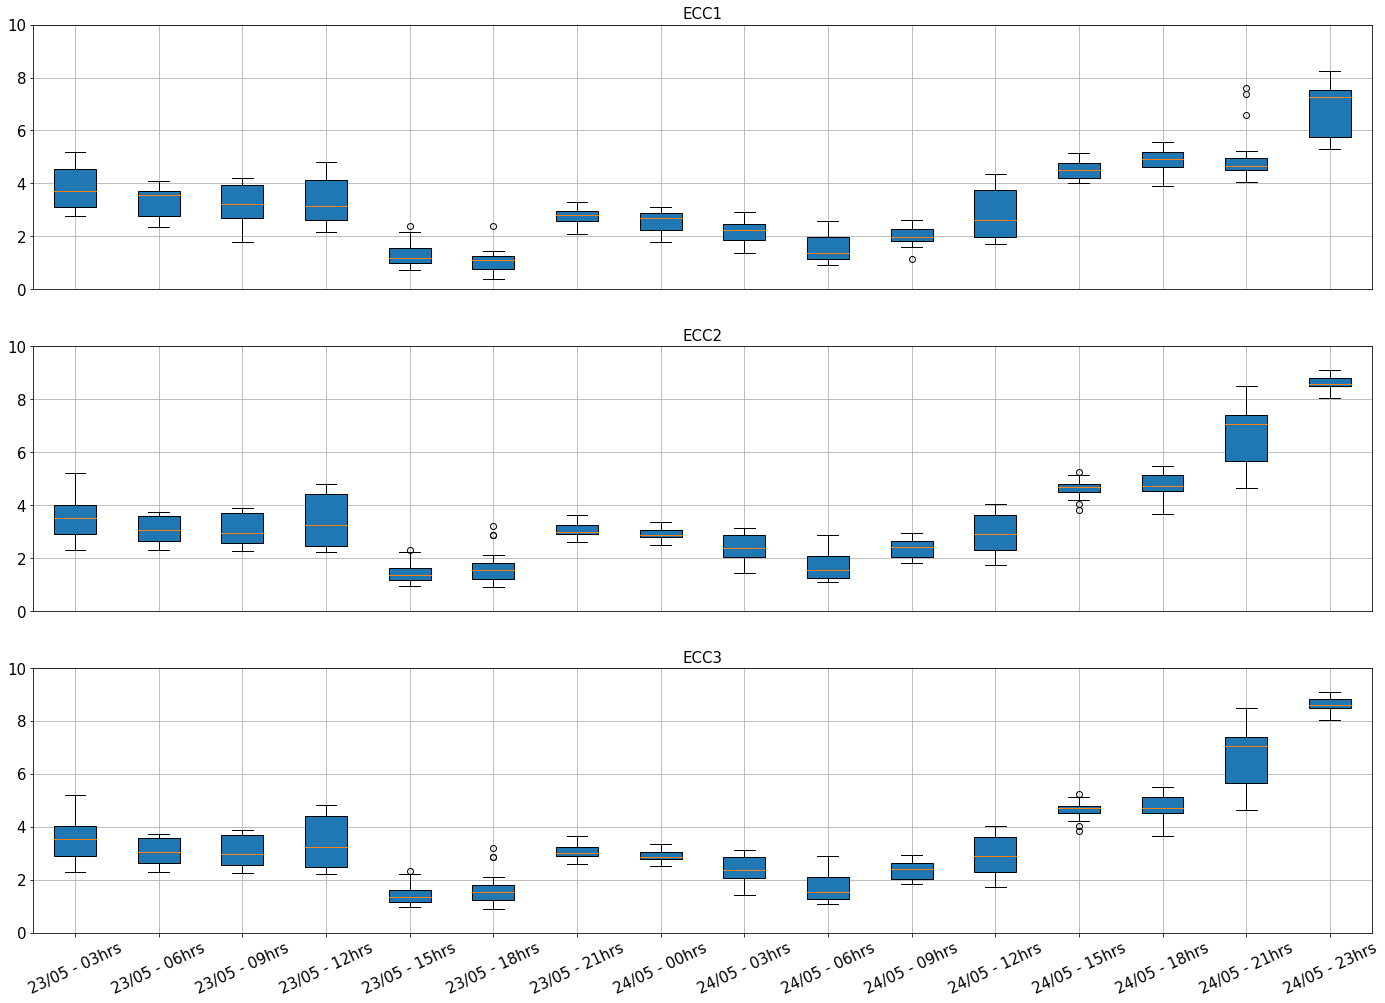

In [3]:
d1 = pd.read_csv('../tcc/data/ecc1_.csv')
d2 = pd.read_csv('../tcc/data/ecc2_.csv')
d3 = pd.read_csv('../tcc/data/ecc3_.csv')


d1Caso1 = d1[(d1.data>'2018-05-23') & (d1.data<'2018-05-25')].iloc[:,[0,6]]
d1Caso1.index = pd.to_datetime(d1Caso1.data)
d2Caso1 = d2[(d2.data>'2018-05-23') & (d2.data<'2018-05-25')].iloc[:,[0,6]]
d2Caso1.index = pd.to_datetime(d2Caso1.data)
d3Caso1 = d3[(d3.data>'2018-05-23') & (d3.data<'2018-05-25')].iloc[:,[0,6]]
d3Caso1.index = pd.to_datetime(d3Caso1.data)


box=[]
datas=[]
box1=[]
box2=[]
box3=[]
list_date = pd.date_range(datetime.datetime(2018,5,23,0),datetime.datetime(2018,5,25,0),freq='3H')
for time in list_date[:-1]:
    time_i, time_f = time, time+datetime.timedelta(hours=3)
    df = predict.loc[str(time_i):str(time_f)]
    
    box1.append(list(map(float,d1Caso1.loc[str(time_i):str(time_f)].vs_med.astype('float').to_list())))
    box2.append(list(map(float,d2Caso1.loc[str(time_i):str(time_f)].vs_med.astype('float').to_list())))
    box3.append(list(map(float,d3Caso1.loc[str(time_i):str(time_f)].vs_med.astype('float').to_list())))
    datas.append(list(map(str,dCaso1.loc[str(time_i):str(time_f)].iloc[:,0].to_list()))[-1])

    
fig, axs = plt.subplots(3,figsize =(20, 14))
axs[0].boxplot(x=box1,vert=True, patch_artist=True, labels=newdates)
axs[0].grid(True)
axs[0].set_title('ECC1',fontsize=15)
axs[0].set_ylim(0,10)
axs[0].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelsize=15)


axs[1].boxplot(x=box2,vert=True, patch_artist=True, labels=newdates)
axs[1].grid(True)
axs[1].set_title('ECC2',fontsize=15)
axs[1].set_ylim(0,10)
axs[1].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelsize=15)


axs[2].boxplot(x=box2,vert=True, patch_artist=True, labels=newdates)
axs[2].grid(True)
axs[2].set_title('ECC3',fontsize=15)
axs[2].set_ylim(0,10)
axs[2].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelsize=15)


fig.tight_layout(pad=3.0)
plt.xticks(rotation=25)
plt.savefig('boxplots_caso1.png', dpi=300, facecolor='w', edgecolor='w',
          format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
         metadata=None)
plt.show()

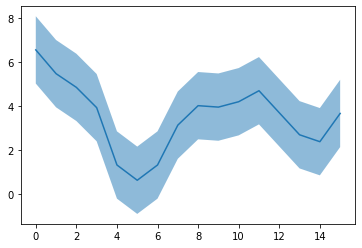